<a href="https://colab.research.google.com/github/danial-amin/Coursera-DeeplearningAI-TensorFlow/blob/main/Automat_1_10_3_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lightgbm

In [2]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 48 kB/s 


In [3]:
!pip install xgboost

In [4]:
!pip install dragonfly-opt

     |████████████████████████████████| 252 kB 3.9 MB/s 
  Created wheel for dragonfly-opt: filename=dragonfly_opt-0.1.6-cp37-cp37m-linux_x86_64.whl size=411415 sha256=eab29930c847168c9172daa3bcf28105f3b31ff0adf37977fac1724694e83674
  Stored in directory: /root/.cache/pip/wheels/bb/79/94/461f622bdd697be30dfe11c2590b574deee78320aa6f5cc2ba
Successfully built dragonfly-opt


In [5]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm
from sklearn.tree import DecisionTreeRegressor #DecisionTree
from sklearn.metrics import explained_variance_score as ev # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric
from sklearn.metrics import mean_absolute_error as mae
from sklearn import metrics
from termcolor import colored as cl
from sklearn.metrics import mean_squared_error as mse #evaluation metric
from sklearn.ensemble import RandomForestRegressor as RF
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm
from lightgbm  import LGBMRegressor as lgr
import catboost
from catboost import CatBoostRegressor as lgc
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import TheilSenRegressor as TR
from sklearn.linear_model import SGDRegressor as SG
from sklearn.linear_model import HuberRegressor as HR
from __future__ import print_function
from argparse import Namespace
from dragonfly import load_config_file, multiobjective_maximise_functions
%matplotlib inline

In [6]:
df=pd.read_csv("MFT.csv")
df.head()

,total mass / g,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a29,a30,a31,a32,a33,a34,a35,Conductivity,Voltage,Lithium efficiency
0,5.000,0.580385,0.000,0.00,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008490225,4.452,0.76744186
1,5.000,0.574581,0.000,0.00,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008345027,4.466,0.677419355
2,5.009,0.023000,0.600,0.00,NaN,NaN,0.27,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008392345,5.015,0.902912621
3,5.044,0.000000,0.000,3.27,NaN,NaN,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000570813,3.902,0
4,5.112,NaN,1.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013468982,4.021,0


In [7]:
lis=['a'+str(x) for x in range(1,36)]
print(lis)

['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a31', 'a32', 'a33', 'a34', 'a35']


In [8]:
for l in lis:
  df[l]=df[l].fillna(0)
df.head()

,total mass / g,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a29,a30,a31,a32,a33,a34,a35,Conductivity,Voltage,Lithium efficiency
0,5.000,0.580385,0.000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008490225,4.452,0.76744186
1,5.000,0.574581,0.000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008345027,4.466,0.677419355
2,5.009,0.023000,0.600,0.00,0.0,0.0,0.27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008392345,5.015,0.902912621
3,5.044,0.000000,0.000,3.27,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000570813,3.902,0
4,5.112,0.000000,1.172,0.00,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013468982,4.021,0


In [9]:
df.describe()

,total mass / g,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,a35
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,8.056339,0.202527,0.533720,0.206886,0.062029,0.063192,0.305450,0.045628,0.039882,0.023183,...,0.021932,0.026354,0.080387,0.002313,0.160555,0.044535,0.015904,0.017236,0.019503,0.017820
std,5.130339,0.448196,0.695272,0.658756,0.256032,0.495834,0.416210,0.150234,0.189315,0.132440,...,0.139148,0.117634,0.275633,0.025817,0.260005,0.081576,0.073297,0.073629,0.113018,0.088379
min,2.168723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.005000,0.000000,0.073250,0.000000,0.000000,0.000000,0.015750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.735690,0.033500,0.405350,0.000000,0.000000,0.000000,0.254009,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.011975,0.210000,0.642625,0.020000,0.000000,0.000000,0.401500,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.017483,0.000000,0.293150,0.054000,0.000000,0.000000,0.000000,0.000000
max,59.554000,6.628691,7.180000,5.240000,2.360000,5.209637,3.255000,1.686200,2.399600,2.013300,...,1.494200,1.564800,2.320000,0.400000,3.050600,0.537000,0.739000,0.712100,1.080000,0.846900


In [10]:
df.dtypes

total mass / g        float64
a1                    float64
a2                    float64
a3                    float64
a4                    float64
a5                    float64
a6                    float64
a7                    float64
a8                    float64
a9                    float64
a10                   float64
a11                   float64
a12                   float64
a13                   float64
a14                   float64
a15                   float64
a16                   float64
a17                   float64
a18                   float64
a19                   float64
a20                   float64
a21                   float64
a22                   float64
a23                   float64
a24                   float64
a25                   float64
a26                   float64
a27                   float64
a28                   float64
a29                   float64
a30                   float64
a31                   float64
a32                   float64
a33       

In [11]:
df=df.convert_dtypes()

In [12]:
df.dtypes

total mass / g        Float64
a1                    Float64
a2                    Float64
a3                    Float64
a4                    Float64
a5                    Float64
a6                    Float64
a7                    Float64
a8                    Float64
a9                    Float64
a10                   Float64
a11                   Float64
a12                   Float64
a13                   Float64
a14                   Float64
a15                   Float64
a16                   Float64
a17                   Float64
a18                   Float64
a19                   Float64
a20                   Float64
a21                   Float64
a22                   Float64
a23                   Float64
a24                   Float64
a25                   Float64
a26                   Float64
a27                   Float64
a28                   Float64
a29                   Float64
a30                   Float64
a31                   Float64
a32                   Float64
a33       

In [13]:
df.isnull().sum()

total mass / g          0
a1                      0
a2                      0
a3                      0
a4                      0
a5                      0
a6                      0
a7                      0
a8                      0
a9                      0
a10                     0
a11                     0
a12                     0
a13                     0
a14                     0
a15                     0
a16                     0
a17                     0
a18                     0
a19                     0
a20                     0
a21                     0
a22                     0
a23                     0
a24                     0
a25                     0
a26                     0
a27                     0
a28                     0
a29                     0
a30                     0
a31                     0
a32                     0
a33                     0
a34                     0
a35                     0
Conductivity          130
Voltage               202
Lithium effi

In [14]:
df=df.dropna()

In [15]:
df.head()

,total mass / g,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a29,a30,a31,a32,a33,a34,a35,Conductivity,Voltage,Lithium efficiency
0,5.0,0.580385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008490225,4.452,0.76744186
1,5.0,0.574581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008345027,4.466,0.677419355
2,5.009,0.023,0.6,0.0,0.0,0.0,0.27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008392345,5.015,0.902912621
3,5.044,0.0,0.0,3.27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000570813,3.902,0
4,5.112,0.0,1.172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013468982,4.021,0


In [16]:
df['Conductivity']=pd.to_numeric(df['Conductivity'], errors='coerce')
df['Voltage']=pd.to_numeric(df['Voltage'], errors='coerce')
df['Lithium efficiency']=pd.to_numeric(df['Lithium efficiency'], errors='coerce')

In [17]:
df.isnull().sum()

total mass / g         0
a1                     0
a2                     0
a3                     0
a4                     0
a5                     0
a6                     0
a7                     0
a8                     0
a9                     0
a10                    0
a11                    0
a12                    0
a13                    0
a14                    0
a15                    0
a16                    0
a17                    0
a18                    0
a19                    0
a20                    0
a21                    0
a22                    0
a23                    0
a24                    0
a25                    0
a26                    0
a27                    0
a28                    0
a29                    0
a30                    0
a31                    0
a32                    0
a33                    0
a34                    0
a35                    0
Conductivity           6
Voltage               69
Lithium efficiency    14
dtype: int64

In [18]:
df=df.dropna()

In [19]:
df.isnull().sum()

total mass / g        0
a1                    0
a2                    0
a3                    0
a4                    0
a5                    0
a6                    0
a7                    0
a8                    0
a9                    0
a10                   0
a11                   0
a12                   0
a13                   0
a14                   0
a15                   0
a16                   0
a17                   0
a18                   0
a19                   0
a20                   0
a21                   0
a22                   0
a23                   0
a24                   0
a25                   0
a26                   0
a27                   0
a28                   0
a29                   0
a30                   0
a31                   0
a32                   0
a33                   0
a34                   0
a35                   0
Conductivity          0
Voltage               0
Lithium efficiency    0
dtype: int64

In [20]:
df.head()

,total mass / g,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a29,a30,a31,a32,a33,a34,a35,Conductivity,Voltage,Lithium efficiency
0,5.0,0.580385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008490,4.452,0.767442
1,5.0,0.574581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008345,4.466,0.677419
2,5.009,0.023,0.6,0.0,0.0,0.0,0.27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008392,5.015,0.902913
3,5.044,0.0,0.0,3.27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000571,3.902,0.000000
4,5.112,0.0,1.172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013469,4.021,0.000000


In [21]:
df.dtypes

total mass / g        Float64
a1                    Float64
a2                    Float64
a3                    Float64
a4                    Float64
a5                    Float64
a6                    Float64
a7                    Float64
a8                    Float64
a9                    Float64
a10                   Float64
a11                   Float64
a12                   Float64
a13                   Float64
a14                   Float64
a15                   Float64
a16                   Float64
a17                   Float64
a18                   Float64
a19                   Float64
a20                   Float64
a21                   Float64
a22                   Float64
a23                   Float64
a24                   Float64
a25                   Float64
a26                   Float64
a27                   Float64
a28                   Float64
a29                   Float64
a30                   Float64
a31                   Float64
a32                   Float64
a33       

In [22]:
df.head()

,total mass / g,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a29,a30,a31,a32,a33,a34,a35,Conductivity,Voltage,Lithium efficiency
0,5.0,0.580385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008490,4.452,0.767442
1,5.0,0.574581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008345,4.466,0.677419
2,5.009,0.023,0.6,0.0,0.0,0.0,0.27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008392,5.015,0.902913
3,5.044,0.0,0.0,3.27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000571,3.902,0.000000
4,5.112,0.0,1.172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013469,4.021,0.000000


In [23]:
df.describe()

,total mass / g,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a29,a30,a31,a32,a33,a34,a35,Conductivity,Voltage,Lithium efficiency
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.0,144.000000,144.000000,144.00000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,8.483305,0.225111,0.527933,0.116592,0.075701,0.0,0.310319,0.063844,0.04151,0.038581,...,0.000285,0.235847,0.054137,0.026510,0.024633,0.039788,0.027733,0.005165,4.168602,0.695267
std,3.597997,0.321585,0.577663,0.465726,0.289915,0.0,0.339884,0.176882,0.18635,0.187869,...,0.003417,0.361490,0.088597,0.108858,0.098927,0.166849,0.120772,0.002854,0.461861,0.315643
min,3.885986,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,2.692000,0.000000
25%,5.057250,0.000000,0.102000,0.000000,0.000000,0.0,0.028050,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003080,3.934750,0.632143
50%,9.406650,0.065000,0.388231,0.000000,0.000000,0.0,0.262660,0.000000,0.00000,0.000000,...,0.000000,0.146700,0.000000,0.000000,0.000000,0.000000,0.000000,0.005018,4.097500,0.840299
75%,10.018500,0.372250,0.793340,0.000000,0.000000,0.0,0.516075,0.000000,0.00000,0.000000,...,0.000000,0.300000,0.099475,0.000000,0.000000,0.000000,0.000000,0.007086,4.452000,0.906310
max,29.759000,1.343000,3.573000,3.547200,2.004000,0.0,1.930000,1.291700,1.88710,2.013300,...,0.041000,3.050600,0.537000,0.739000,0.712100,1.080000,0.811100,0.013469,5.311000,1.012838


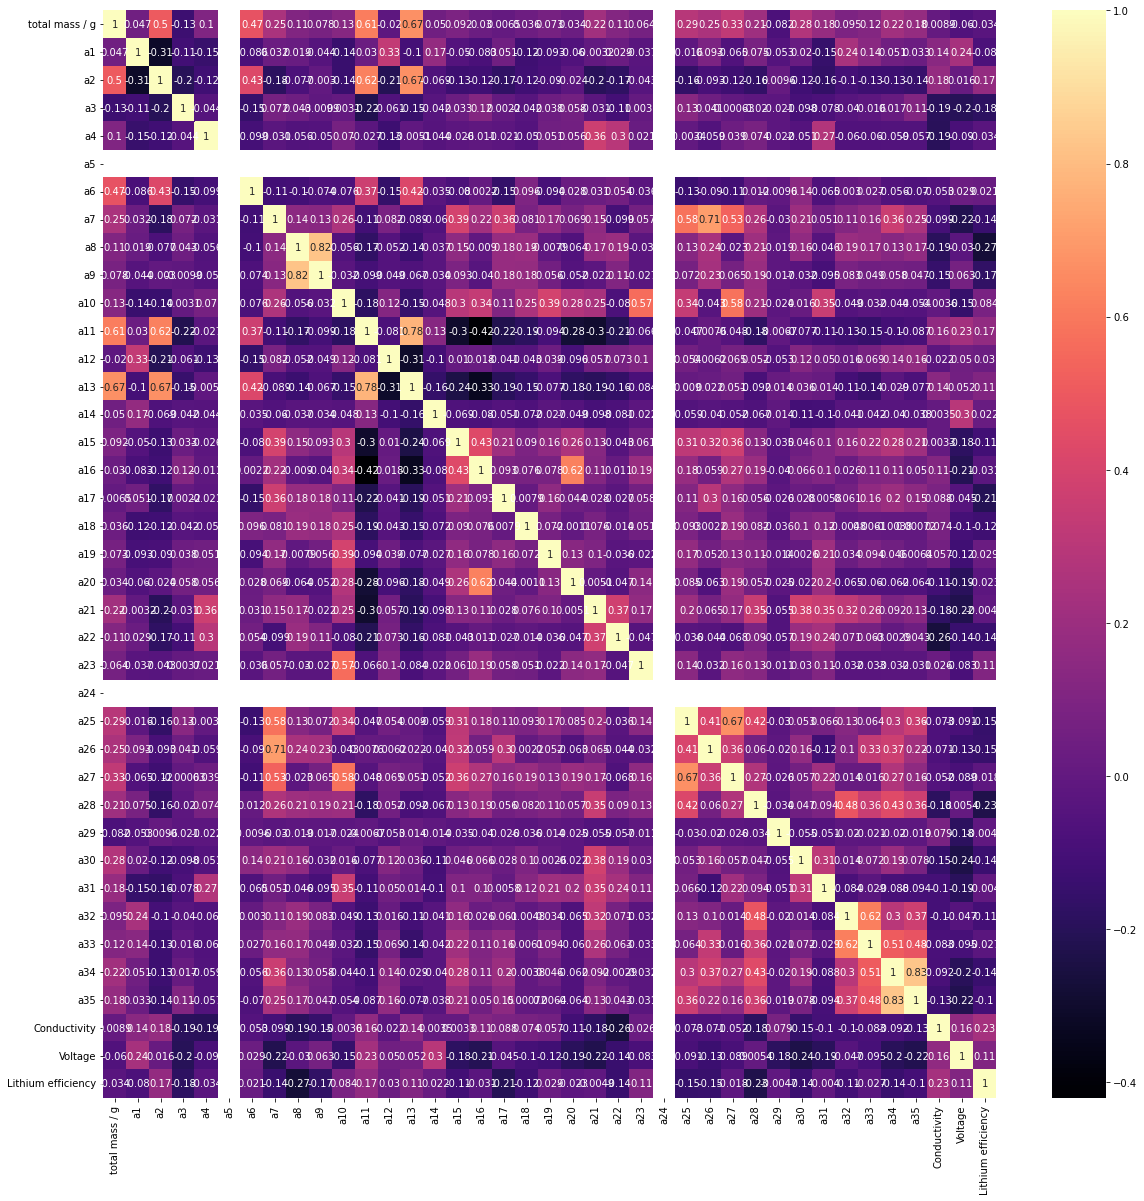

In [24]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

In [25]:
df.head()

,total mass / g,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a29,a30,a31,a32,a33,a34,a35,Conductivity,Voltage,Lithium efficiency
0,5.0,0.580385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008490,4.452,0.767442
1,5.0,0.574581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008345,4.466,0.677419
2,5.009,0.023,0.6,0.0,0.0,0.0,0.27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008392,5.015,0.902913
3,5.044,0.0,0.0,3.27,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000571,3.902,0.000000
4,5.112,0.0,1.172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013469,4.021,0.000000


In [26]:
status=pd.read_csv("State.csv")
status.head()

,Unnamed: 0,Index,State
0,0,a1,1
1,1,a2,1
2,2,a3,1
3,3,a4,1
4,4,a5,0


In [27]:
for i in range(len(status.Index)):
  if status["State"][i]==0:
    a=status["Index"][i]
    df.pop(str(a))
df.describe()

,total mass / g,a1,a2,a3,a4,a6,a7,a11,a12,a13,...,a21,a22,a25,a27,a28,a30,a31,Conductivity,Voltage,Lithium efficiency
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,8.483305,0.225111,0.527933,0.116592,0.075701,0.310319,0.063844,1.742884,0.494226,2.065232,...,0.486962,0.506214,0.056457,0.035024,0.068903,0.235847,0.054137,0.005165,4.168602,0.695267
std,3.597997,0.321585,0.577663,0.465726,0.289915,0.339884,0.176882,1.396354,0.788299,2.219827,...,0.747735,0.751785,0.160481,0.112887,0.170678,0.361490,0.088597,0.002854,0.461861,0.315643
min,3.885986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,2.692000,0.000000
25%,5.057250,0.000000,0.102000,0.000000,0.000000,0.028050,0.000000,0.824734,0.000000,0.774787,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003080,3.934750,0.632143
50%,9.406650,0.065000,0.388231,0.000000,0.000000,0.262660,0.000000,1.604000,0.000000,1.560000,...,0.095059,0.202000,0.000000,0.000000,0.000000,0.146700,0.000000,0.005018,4.097500,0.840299
75%,10.018500,0.372250,0.793340,0.000000,0.000000,0.516075,0.000000,2.728000,1.004035,2.432714,...,0.800000,0.647500,0.000000,0.000000,0.000000,0.300000,0.099475,0.007086,4.452000,0.906310
max,29.759000,1.343000,3.573000,3.547200,2.004000,1.930000,1.291700,9.820000,4.800000,14.598000,...,3.860000,4.140000,1.088000,0.766500,1.002200,3.050600,0.537000,0.013469,5.311000,1.012838


In [28]:
if 'a5' in df.columns:
  df.pop('a5')
if 'a24' in df.columns:
  df.pop('a24')

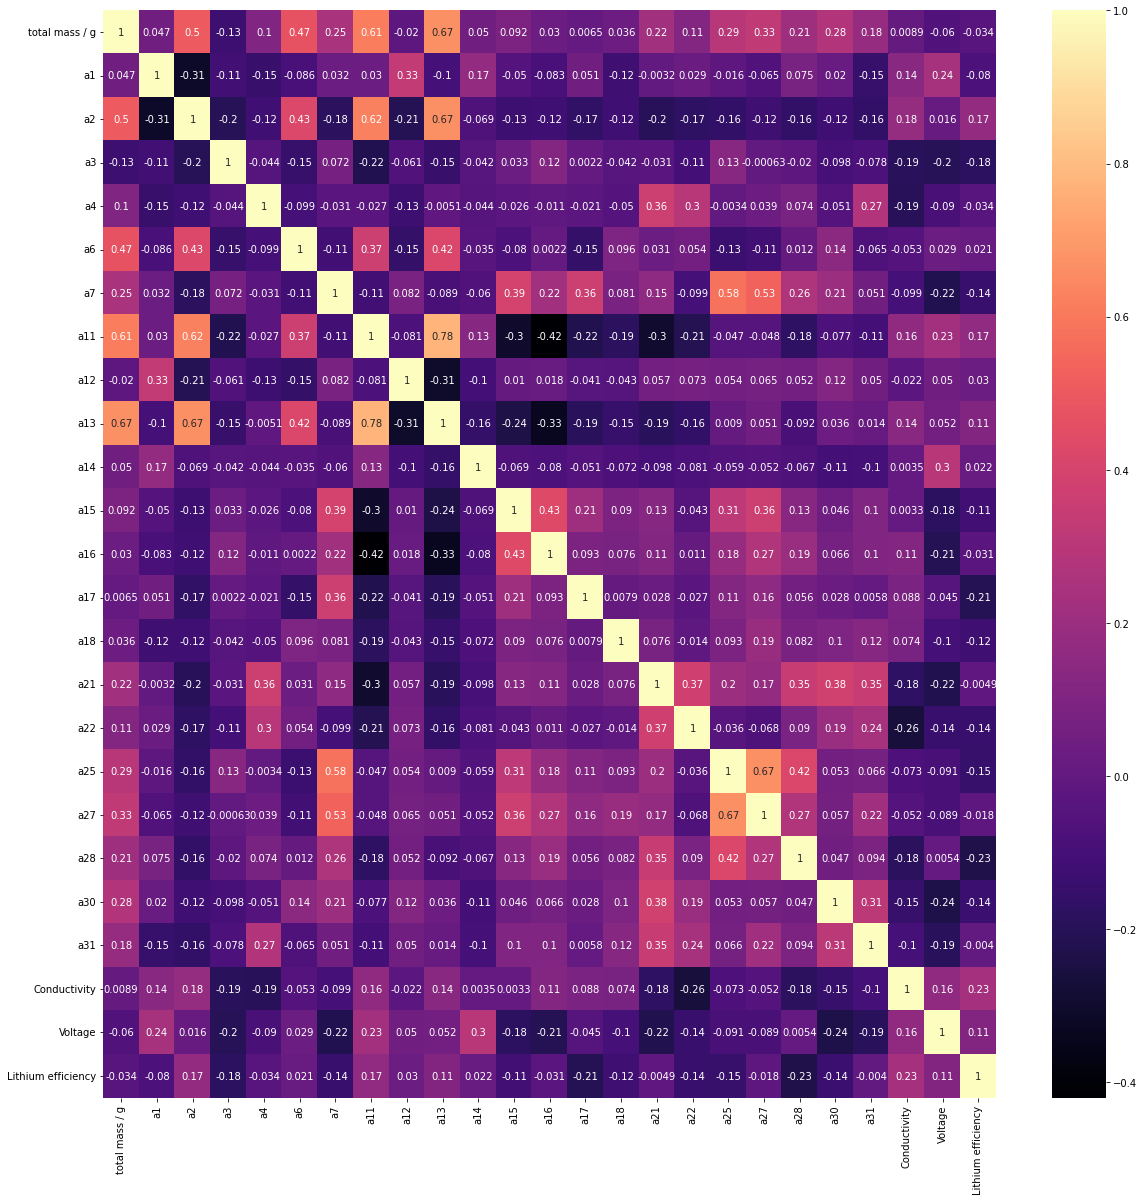

In [29]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

In [30]:
lis=list(df.columns)
lis.remove('Conductivity')
lis.remove('Lithium efficiency')
lis.remove('Voltage')

In [31]:
for l in lis:
  df[l]=df.apply(lambda row :row[l]/row['total mass / g'] , axis = 1)

In [32]:
ols = LinearRegression()
rid = Ridge(alpha = 0.5)
las = Lasso(alpha = 0.01)
bay = BayesianRidge()
en = ElasticNet(alpha = 0.01)
dt=DecisionTreeRegressor()
tr=TR()
hr=HR(max_iter=5000)
sg=SG()
#sv = SVR(kernel='rbf')
rf = RF(max_depth=6, random_state=0)
abr = AdaBoostRegressor(random_state=0, n_estimators=500)
xgr = XGBRegressor()
lg=lgr()
cg=lgc()
#models=[ols,rid,las,bay,en,dt,tr,hr,sg,sv,rf,abr,xgr,lgr,cgr]
models1=[LinearRegression(),Ridge(alpha = 0.5),Lasso(alpha = 0.01),BayesianRidge(),ElasticNet(alpha = 0.01),DecisionTreeRegressor(),TR(),HR(max_iter=5000),SG(),RF(max_depth=6, random_state=0),AdaBoostRegressor(random_state=0, n_estimators=500),XGBRegressor(),lgr(),lgc(verbose=False)]
models2=[LinearRegression(),Ridge(alpha = 0.5),Lasso(alpha = 0.01),BayesianRidge(),ElasticNet(alpha = 0.01),DecisionTreeRegressor(),TR(),HR(max_iter=5000),SG(),RF(max_depth=6, random_state=0),AdaBoostRegressor(random_state=0, n_estimators=500),XGBRegressor(),lgr(),lgc(verbose=False)]
models3=[LinearRegression(),Ridge(alpha = 0.5),Lasso(alpha = 0.01),BayesianRidge(),ElasticNet(alpha = 0.01),DecisionTreeRegressor(),TR(),HR(max_iter=5000),SG(),RF(max_depth=6, random_state=0),AdaBoostRegressor(random_state=0, n_estimators=500),XGBRegressor(),lgr(),lgc(verbose=False)]

In [33]:
X_var = df[lis].values
y_varc = df['Conductivity'].values
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_var, y_varc, test_size = 0.2, random_state = 0)
y_varl= df['Lithium efficiency'].values
X_trainl, X_testl, y_trainl, y_testl = train_test_split(X_var, y_varl, test_size = 0.2, random_state = 0)
y_varv= df['Voltage'].values
X_trainv, X_testv, y_trainv, y_testv = train_test_split(X_var, y_varv, test_size = 0.2, random_state = 0)


In [34]:
def inits(m,X,y):
  a=m
  X_train, X_test, y_train, y_test=train_test_split(X,y,test_size = 0.2, random_state = 0)
  a.fit(X_train,y_train)
  return a

In [35]:
domain=[[0,0.5]]*(len(lis))
pv=[]
pp=[]
h=[]
n=len(models1)
for i in range(n):
  m1=models1[i]
  m2=models2[i]
  m3=models3[i]
  mc=inits(m1,df[lis].values,df['Conductivity'].values)
  ml=inits(m2,df[lis].values,df['Lithium efficiency'].values)
  mv=inits(m3,df[lis].values,df['Voltage'].values)
  def func(x):
    if np.sum(x)>1:
      pass
    return [abs(mc.predict(np.array(x).reshape(1,-1))),abs(ml.predict(np.array(x).reshape(1,-1)))]
  m_obj=(func,2)
  p_v, p_p, his = multiobjective_maximise_functions(m_obj,domain, max_capital=100,options=None)
  pv.append(p_v)
  pp.append(p_p)
  h.append(his)

Multi-objective Optimisation with mobo(ucb-ts) using capital 100.0 (return_value)
Capital spent on initialisation: 8.0000(0.0800).
Legend: <iteration_number> (<num_successful_queries>, <fraction_of_capital_spent>):: #Pareto=<num_pareto_optimal_points_found>, acqs=<num_times_each_acquisition_was_used>
#013 (011, 0.110):: #Pareto: 3, acqs=[ucb:1, ts:2], 
#026 (024, 0.240):: #Pareto: 4, acqs=[ucb:8, ts:8], 
#039 (037, 0.370):: #Pareto: 4, acqs=[ucb:10, ts:19], 
#052 (050, 0.500):: #Pareto: 7, acqs=[ucb:12, ts:30], 
#065 (063, 0.630):: #Pareto: 6, acqs=[ucb:12, ts:43], 
#078 (076, 0.760):: #Pareto: 6, acqs=[ucb:14, ts:54], 
#091 (089, 0.890):: #Pareto: 7, acqs=[ucb:16, ts:65], 
#102 (101, 1.010):: #Pareto: 8, acqs=[ucb:18, ts:75], 
Multi-objective Optimisation with mobo(ucb-ts) using capital 100.0 (return_value)
Capital spent on initialisation: 8.0000(0.0800).
Legend: <iteration_number> (<num_successful_queries>, <fraction_of_capital_spent>):: #Pareto=<num_pareto_optimal_points_found>, acq

In [36]:
print(p_v)

[[0.005924651670728577, 0.8187803200338181], [0.00520804089017844, 0.8300210127991343], [0.005989625304974935, 0.8012202997561981], [0.006711504293551048, 0.7302044472199515]]


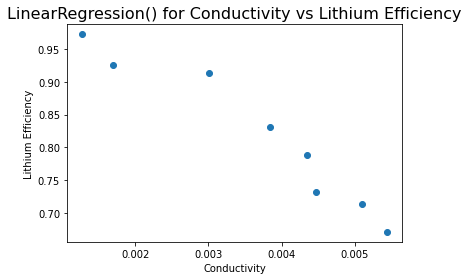

<Figure size 432x288 with 0 Axes>

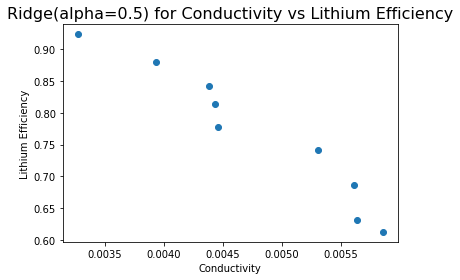

<Figure size 432x288 with 0 Axes>

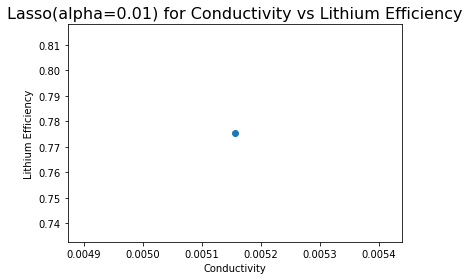

<Figure size 432x288 with 0 Axes>

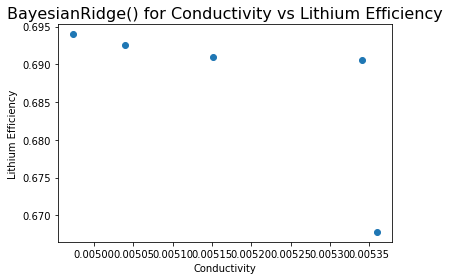

<Figure size 432x288 with 0 Axes>

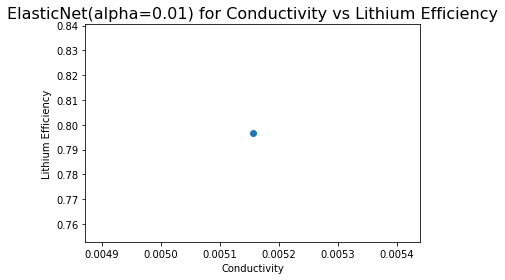

<Figure size 432x288 with 0 Axes>

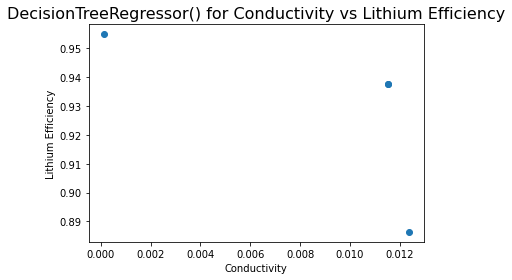

<Figure size 432x288 with 0 Axes>

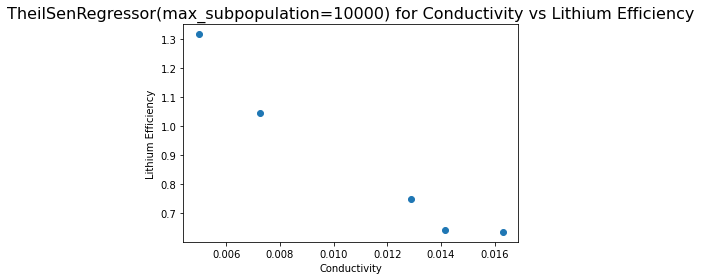

<Figure size 432x288 with 0 Axes>

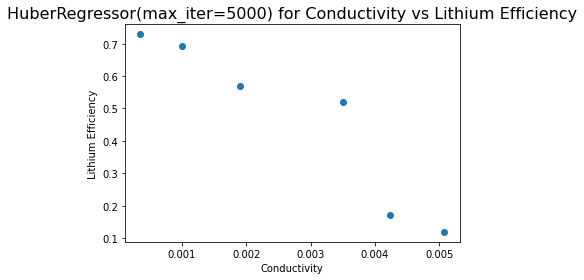

<Figure size 432x288 with 0 Axes>

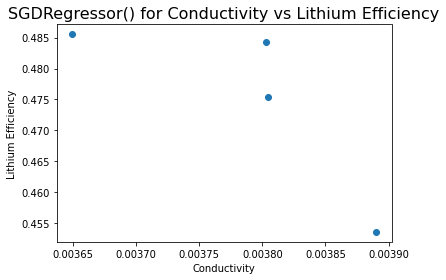

<Figure size 432x288 with 0 Axes>

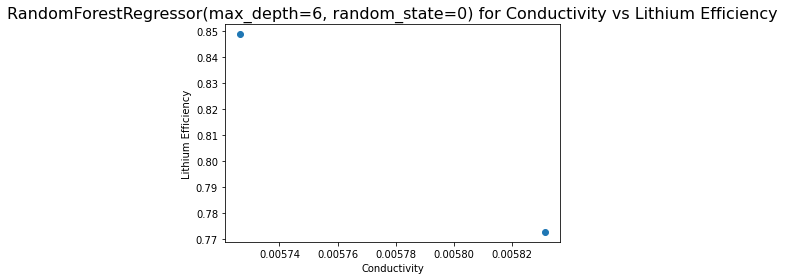

<Figure size 432x288 with 0 Axes>

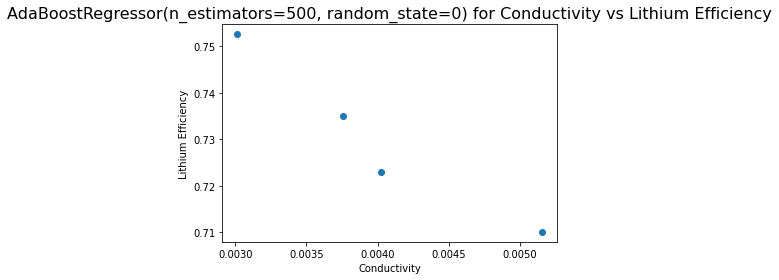

<Figure size 432x288 with 0 Axes>

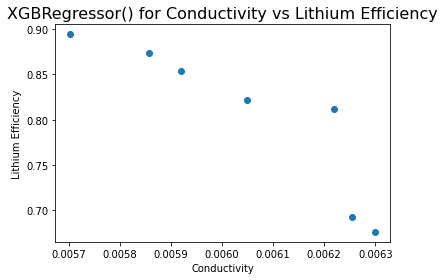

<Figure size 432x288 with 0 Axes>

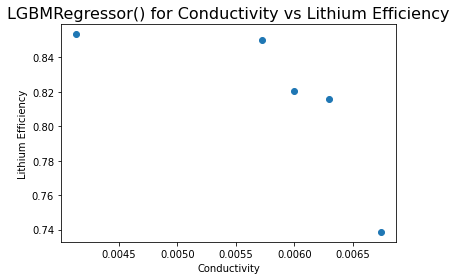

<Figure size 432x288 with 0 Axes>

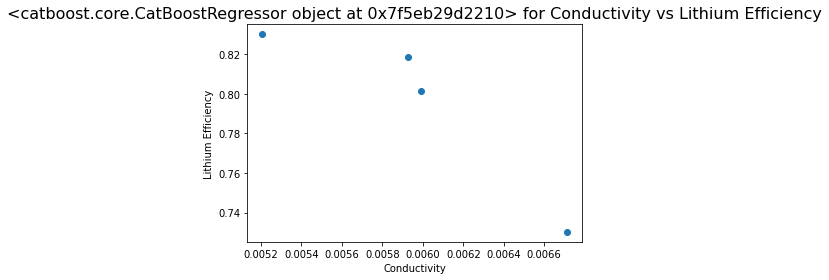

<Figure size 432x288 with 0 Axes>

In [37]:
for i in range(n):
  a=np.array(pv[i])
  x = a[:,0]
  y = a[:,1]
  fig, ax = plt.subplots()
  ax.scatter(x, y, marker='o')
  ax.set_xlabel('Conductivity')
  ax.set_ylabel('Lithium Efficiency')
  plt.title(str(models1[i])+' for Conductivity vs Lithium Efficiency', fontsize = 16)
  plt.show()
  plt.savefig(str(models1[i])+'2D'+'.png')

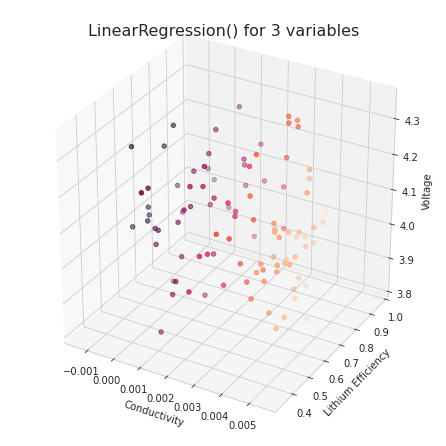

<Figure size 432x288 with 0 Axes>

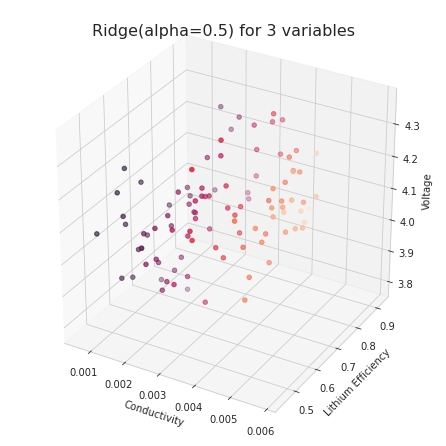

<Figure size 432x288 with 0 Axes>

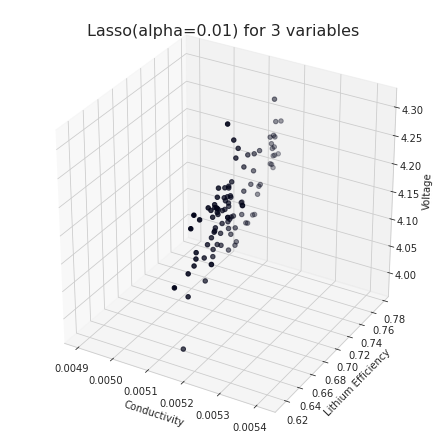

<Figure size 432x288 with 0 Axes>

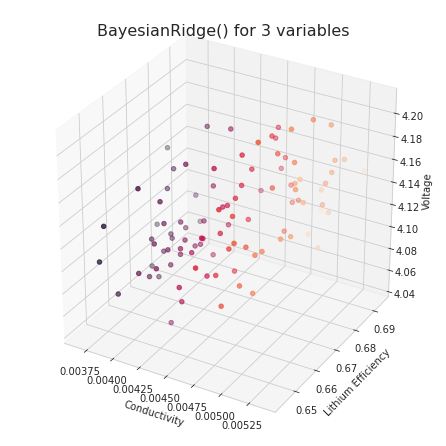

<Figure size 432x288 with 0 Axes>

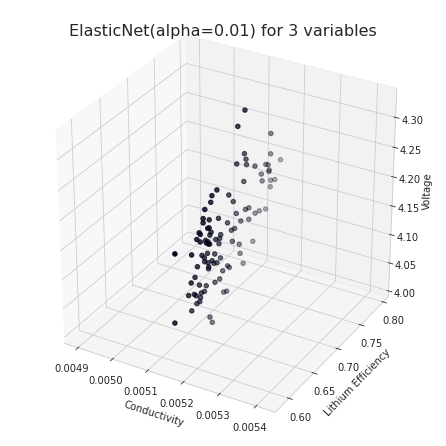

<Figure size 432x288 with 0 Axes>

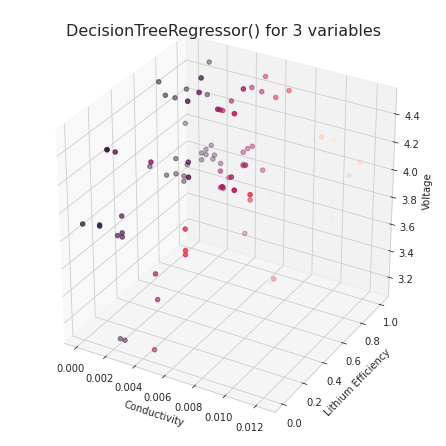

<Figure size 432x288 with 0 Axes>

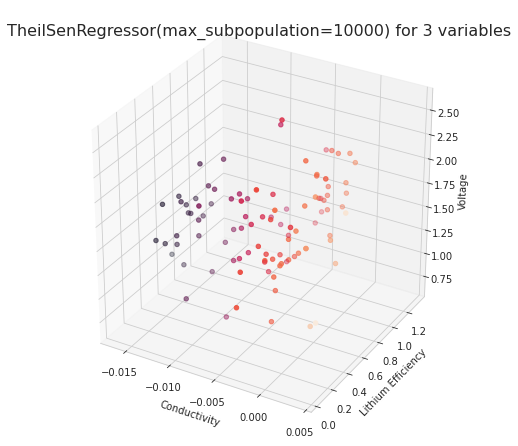

<Figure size 432x288 with 0 Axes>

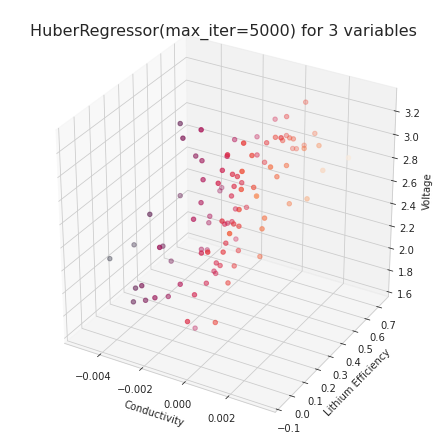

<Figure size 432x288 with 0 Axes>

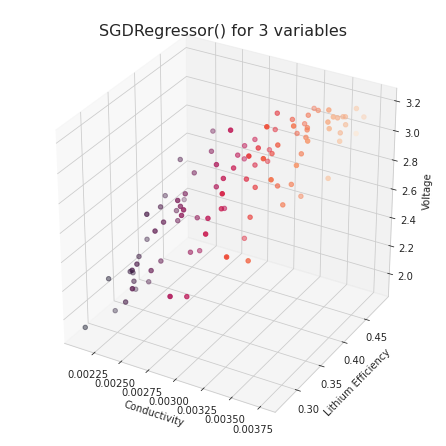

<Figure size 432x288 with 0 Axes>

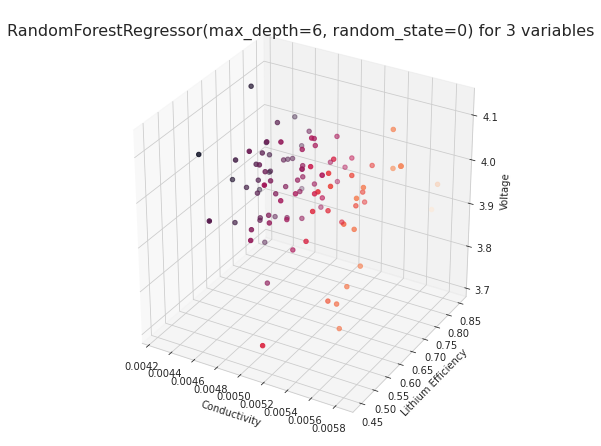

<Figure size 432x288 with 0 Axes>

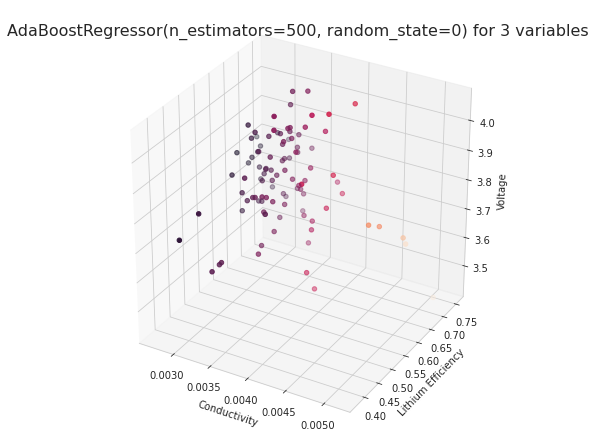

[03:12:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:12:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:12:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


<Figure size 432x288 with 0 Axes>

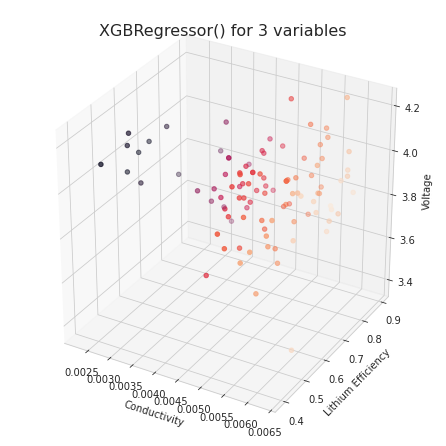

<Figure size 432x288 with 0 Axes>

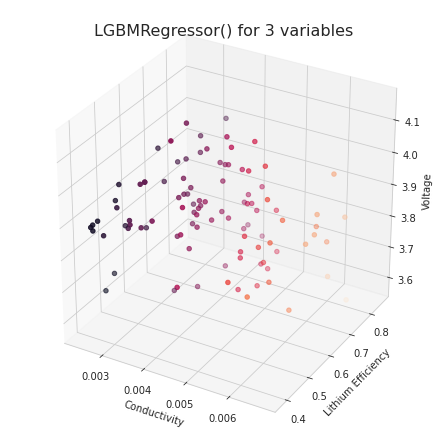

<Figure size 432x288 with 0 Axes>

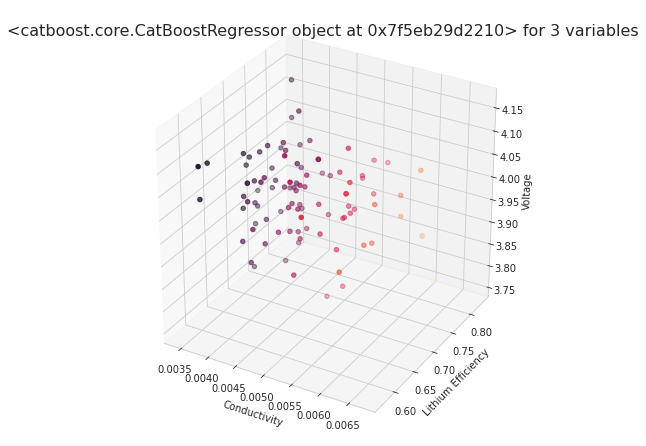

<Figure size 432x288 with 0 Axes>

In [38]:
import re, seaborn as sns, numpy as np, pandas as pd, random
from pylab import *
from matplotlib.pyplot import plot, show, draw, figure, cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})
for i in range(n):
  his=vars(h[i])
  m1=models1[i]
  m2=models2[i]
  m3=models3[i]
  mc=inits(m1,df[lis].values,df['Conductivity'].values)
  ml=inits(m2,df[lis].values,df['Lithium efficiency'].values)
  mv=inits(m3,df[lis].values,df['Voltage'].values)
  query_points = his["query_points"]
  rdf = pd.DataFrame(data=query_points)
  rdf["LCE"] = ml.predict(rdf.values)
  rdf["Conductivity"] = mc.predict(rdf.iloc[:, :-1].values)
  rdf["Voltage"] = mv.predict(rdf.iloc[:, :-2].values)
  
  fig = plt.figure(figsize=(6,6))
  ax = Axes3D(fig)
  x = rdf["Conductivity"]
  y = rdf["LCE"]
  z = rdf["Voltage"]
  ax.scatter(x, y, z, c=x, marker='o')
  ax.set_xlabel('Conductivity')
  ax.set_ylabel('Lithium Efficiency')
  ax.set_zlabel('Voltage')
  ax.set_title(str(models1[i])+' for 3 variables', fontsize = 16)
  plt.show()
  plt.savefig(str(models1[i])+'3D'+'.png')